In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import os
# Use seaborn for conditional plots
import seaborn as sns

dataframe = pd.read_csv('Oscars-demographics.csv')

In [162]:
dataframe.dtypes

_unit_id                           int64
_golden                             bool
_unit_state                       object
_trusted_judgments                 int64
_last_judgment_at                 object
birthplace                        object
birthplace:confidence            float64
date_of_birth                     object
date_of_birth:confidence         float64
race_ethnicity                    object
race_ethnicity:confidence        float64
religion                          object
religion:confidence              float64
sexual_orientation                object
sexual_orientation:confidence    float64
year_of_award                      int64
year_of_award:confidence         float64
award                             object
biourl                            object
birthplace_gold                   object
date_of_birth_gold                object
movie                             object
person                            object
race_ethnicity_gold               object
religion_gold   

In [163]:
dataframe.shape

(441, 27)

In [164]:
dataframe.columns[dataframe.isnull().any()]

Index(['_last_judgment_at', 'birthplace_gold', 'date_of_birth_gold',
       'race_ethnicity_gold', 'religion_gold', 'sexual_orientation_gold',
       'year_of_award_gold'],
      dtype='object')

In [165]:
# Get subset of dataframe.
df_subset = dataframe[['birthplace', 'date_of_birth', 'race_ethnicity', 'year_of_award', 'award']]
# Show first three rows of subset
df_subset.head(3)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director


In [166]:
# Show all unique values of cloumn award in subset
df_subset['award'].unique().tolist()

['Best Director',
 'Best Actor',
 'Best Supporting Actor',
 'Best Actress',
 'Best Supporting Actress']

In [167]:
# Add new column equal to the length of date of birth
df_subset['ldob'] = df_subset['date_of_birth'].str.len()

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
# Show all unique values of cloumn ldob in subset
df_subset['ldob'].unique().tolist()

[11, 10, 8, 9, 15, 4]

In [169]:
def clean_date_of_birth(dob):
    if(len(dob)==4):
        return '01'+'-'+'Jan'+'-'+dob
    tmp_birth = dob.split('-')
    if(len(tmp_birth[2])>4):
        return tmp_birth[0]+'-'+tmp_birth[1]+'-'+tmp_birth[2][:4]
    elif(len(tmp_birth[2])==2):
        return tmp_birth[0]+'-'+tmp_birth[1]+'-'+'19'+tmp_birth[2] 
    else:
        return dob
df_subset['date_of_birth'] = [ clean_date_of_birth(x) for x in df_subset['date_of_birth' ]]

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [170]:
def add_country(birth_place):
    tmp_birth_place = birth_place.split(', ')
    if(birth_place=='New York City'):
        return 'New York City, USA'
    elif(len(tmp_birth_place[-1])==2):
        return birth_place + ', USA'
    else:
        return birth_place
df_subset['birthplace'] = [add_country(x) for x in df_subset['birthplace']]

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [171]:
def get_year_of_birth(x):
    return x.split('-')[-1]
df_subset['year_of_birth'] = df_subset.apply(lambda row: get_year_of_birth(row['date_of_birth']), axis=1)

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
df_subset['year_of_birth'] = df_subset['year_of_birth'].astype('int64')

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
df_subset['award_age'] = df_subset['year_of_award'] - df_subset['year_of_birth']

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
def add_country_column(birth_place):
    return birth_place.split(', ')[-1]
df_subset['country'] = [add_country_column(x) for x in df_subset['birthplace']]

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


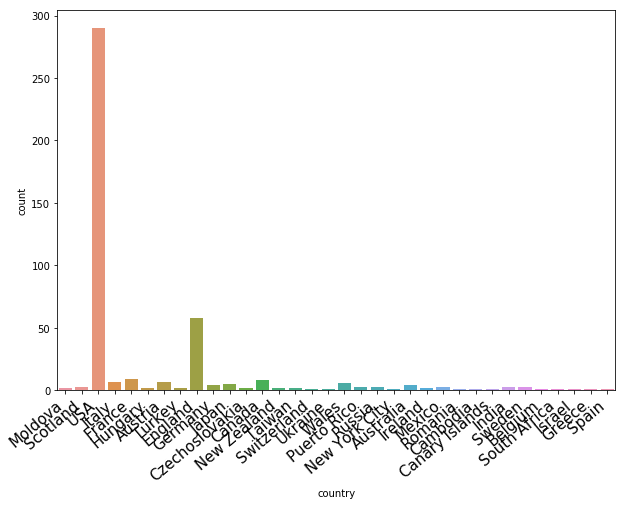

country
Australia           4
Austria             7
Belgium             1
Cambodia            1
Canada              8
Canary Islands      1
Czechoslovakia      2
England            58
France              9
Germany             4
Greece              1
Hungary             2
India               3
Ireland             2
Israel              1
Italy               7
Japan               5
Mexico              3
Moldova             2
New York City       1
New Zealand         2
Puerto Rico         3
Romania             1
Russia              3
Scotland            3
South Africa        1
Spain               1
Sweden              3
Switzerland         1
Taiwan              2
Turkey              2
USA               290
Ukraine             1
Wales               6
dtype: int64

In [175]:
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 15

ax = sns.countplot(x='country',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


plt.show()

df_subset.groupby('country').size()

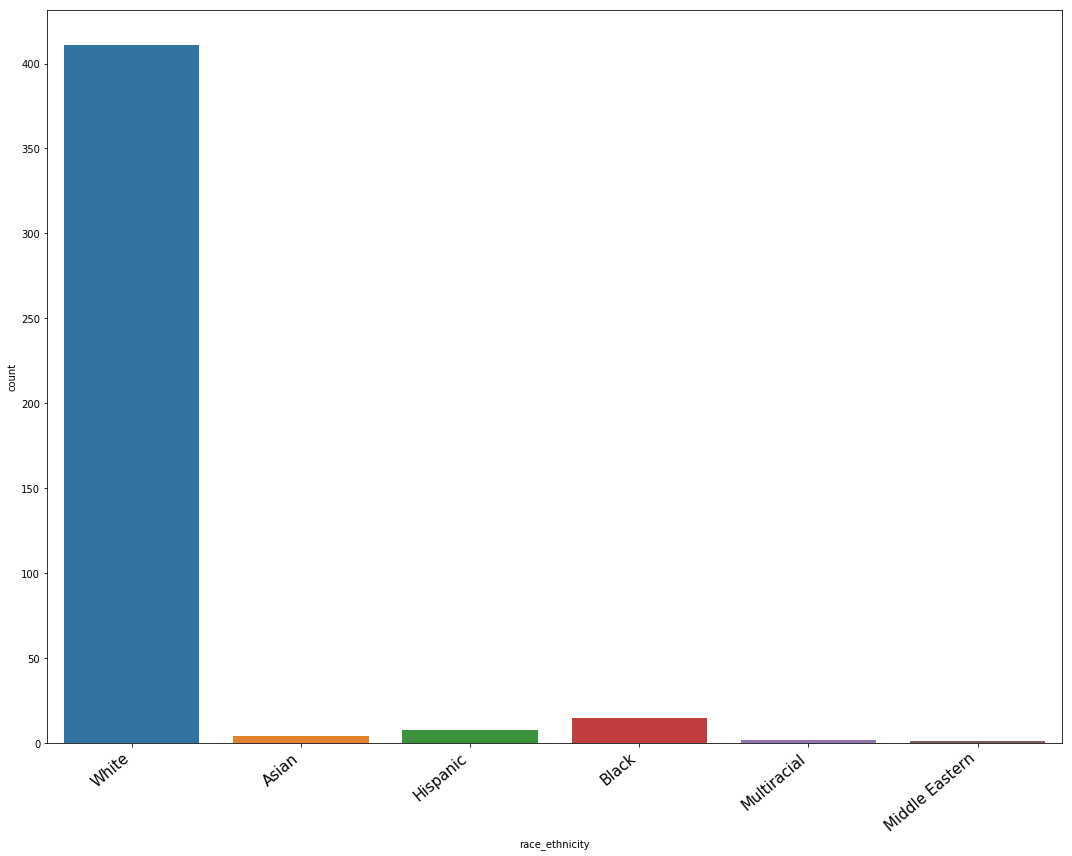

race_ethnicity
Asian               4
Black              15
Hispanic            8
Middle Eastern      1
Multiracial         2
White             411
dtype: int64

In [176]:
ax = sns.countplot(x='race_ethnicity',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 15

plt.show()

df_subset.groupby('race_ethnicity').size()

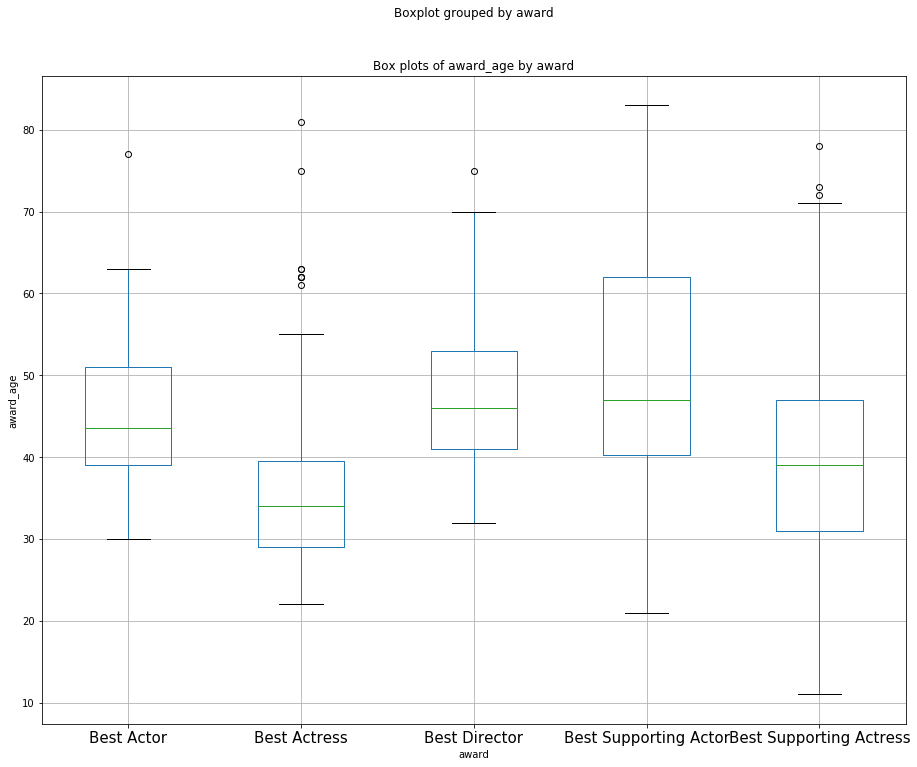

,year_of_award,ldob,year_of_birth,award_age
award,,,,
Best Actor,1971.488636,8.886364,1926.443182,45.045455
Best Actress,1971.936842,8.789474,1935.515789,36.421053
Best Director,1971.362637,9.087912,1924.098901,47.263736
Best Supporting Actor,1975.341463,9.024390,1924.451220,50.890244
Best Supporting Actress,1976.105882,8.917647,1935.600000,40.505882


In [177]:
def auto_boxplot(df, plot_cols, by):
    for col in plot_cols:
        fig = plt.figure(figsize=(15, 12))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of {} by {}'.format(col, by))
        ax.set_ylabel(col)
        plt.show()
plot_cols2 = ["award_age"]
auto_boxplot(df_subset, plot_cols2, "award")
df_subset.groupby('award').mean()

In [178]:
df_subset['age_bucket'] = pd.cut(df_subset['award_age'], 
                                 [0, 35, 45, 55, df_subset['award_age'].max()], 
                                 labels=['0-35', '35-45', '45-55','55'+'-'+str(int(df_subset['award_age'].max()))])

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
## Create a column with new levels for the name of the country

def add_country_category(country):
    if country=="USA":
        return "USA"
    elif country=="Italy":
        return "Italy"
    elif country=="France":
        return "France"
    elif country=="England":
        return "England"
    elif country=="Canada":
        return "Canada"
    else:
        return "Other Countries"
    
df_subset['country_category'] = df_subset.apply(lambda row: add_country_category(row['country']), axis=1)

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [180]:
df_subset['religion'] = dataframe['religion']
df_subset['sexual_orientation'] = dataframe['sexual_orientation']

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


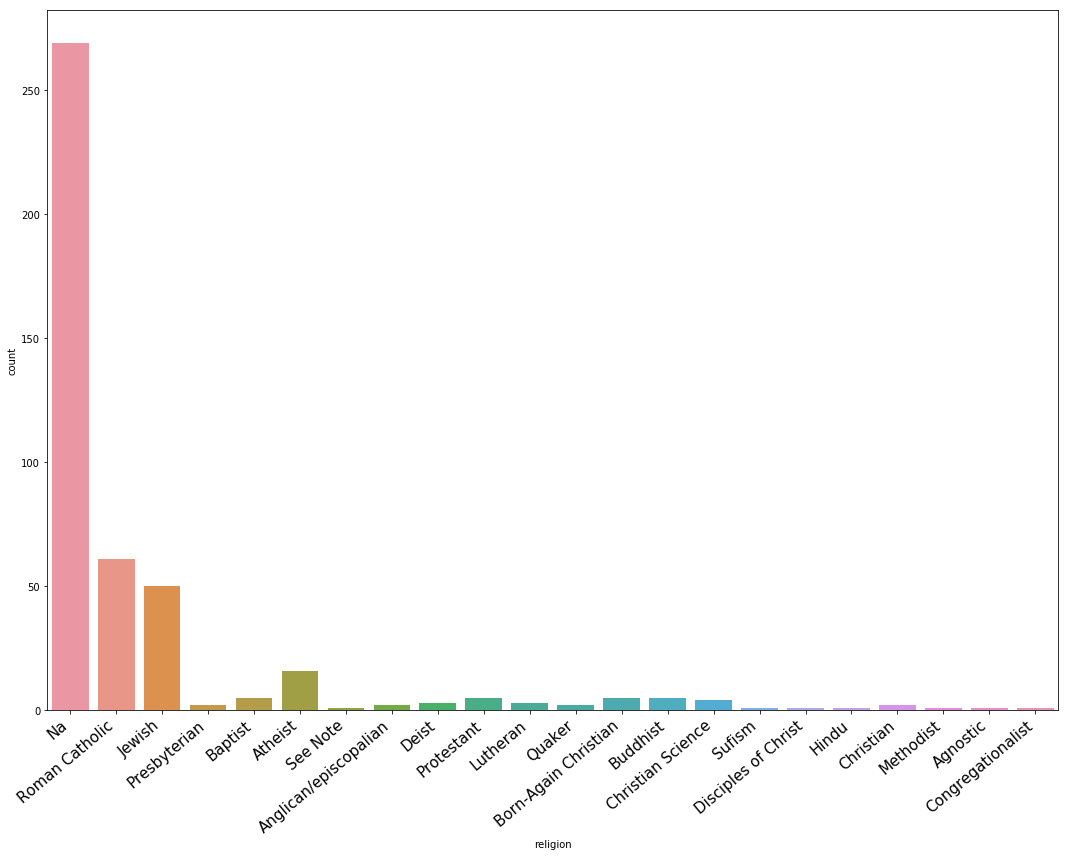

religion
Agnostic                   1
Anglican/episcopalian      2
Atheist                   16
Baptist                    5
Born-Again Christian       5
Buddhist                   5
Christian                  2
Christian Science          4
Congregationalist          1
Deist                      3
Disciples of Christ        1
Hindu                      1
Jewish                    50
Lutheran                   3
Methodist                  1
Na                       269
Presbyterian               2
Protestant                 5
Quaker                     2
Roman Catholic            61
See Note                   1
Sufism                     1
dtype: int64

In [181]:
ax = sns.countplot(x='religion',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 15

plt.show()

df_subset.groupby('religion').size()

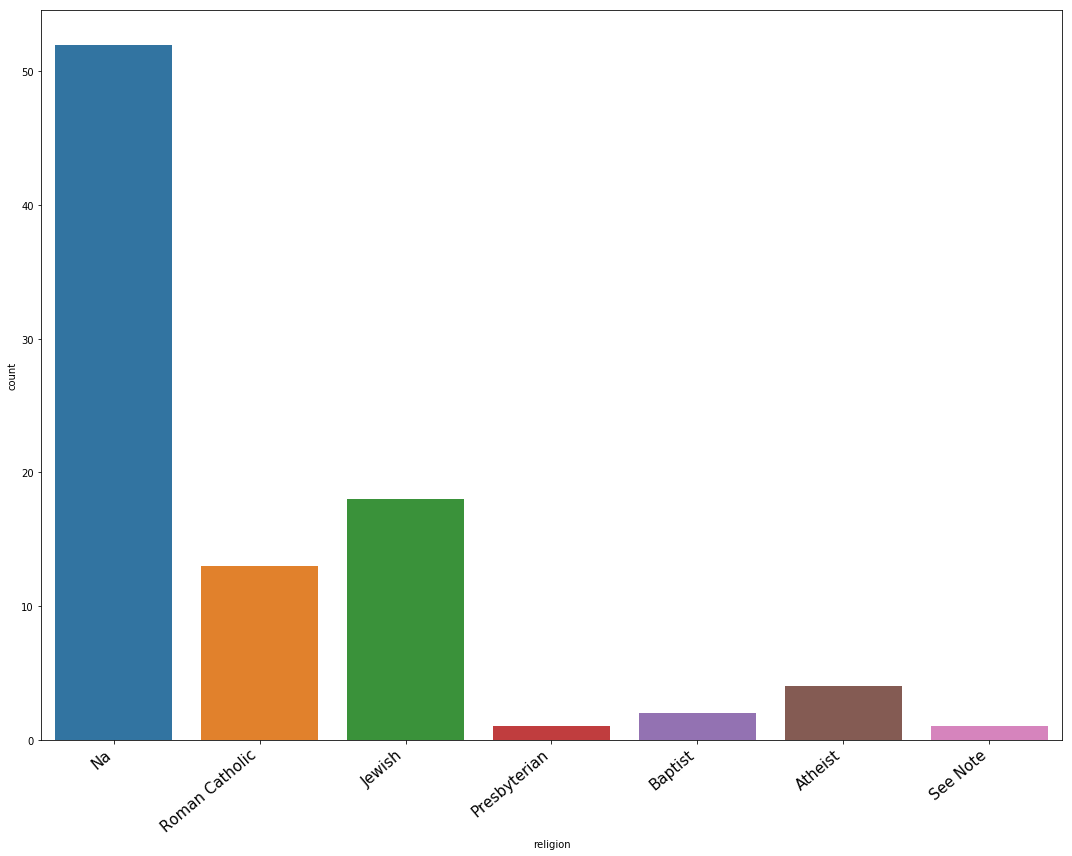

In [182]:
best_director = df_subset[df_subset.award=='Best Director']
best_actor = df_subset[df_subset.award=='Best Actor']
best_actress = df_subset[df_subset.award=='Best Actress']
best_supporting_actor = df_subset[df_subset.award=='Best Supporting Actor']
best_supporting_actress = df_subset[df_subset.award=='Best Supporting Actress']

ax = sns.countplot(x='religion', data=best_director)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

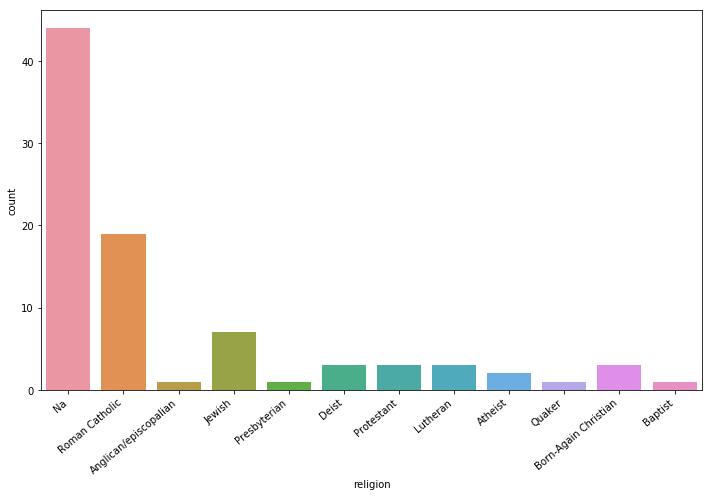

In [183]:
best_director = df_subset[df_subset.award=='Best Director']
best_actor = df_subset[df_subset.award=='Best Actor']
best_actress = df_subset[df_subset.award=='Best Actress']
best_supporting_actor = df_subset[df_subset.award=='Best Supporting Actor']
best_supporting_actress = df_subset[df_subset.award=='Best Supporting Actress']

ax = sns.countplot(x='religion', data=best_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

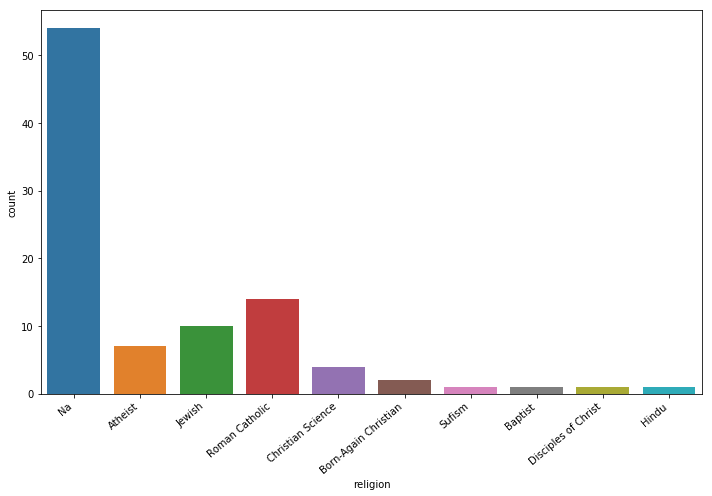

In [184]:
best_director = df_subset[df_subset.award=='Best Director']
best_actor = df_subset[df_subset.award=='Best Actor']
best_actress = df_subset[df_subset.award=='Best Actress']
best_supporting_actor = df_subset[df_subset.award=='Best Supporting Actor']
best_supporting_actress = df_subset[df_subset.award=='Best Supporting Actress']

ax = sns.countplot(x='religion', data=best_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

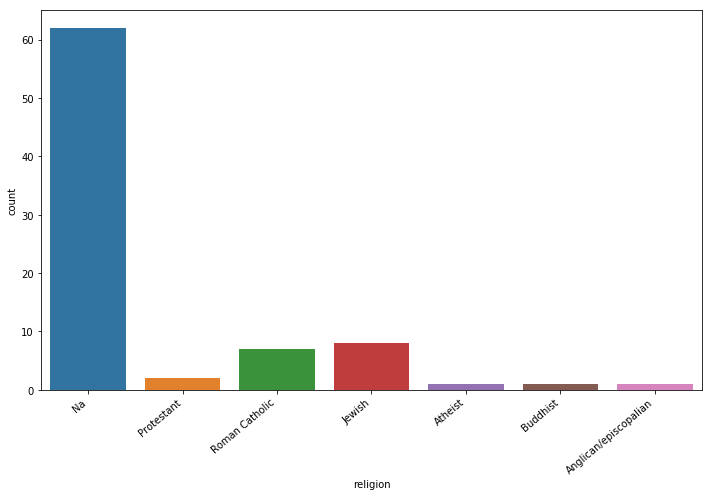

In [185]:
best_director = df_subset[df_subset.award=='Best Director']
best_actor = df_subset[df_subset.award=='Best Actor']
best_actress = df_subset[df_subset.award=='Best Actress']
best_supporting_actor = df_subset[df_subset.award=='Best Supporting Actor']
best_supporting_actress = df_subset[df_subset.award=='Best Supporting Actress']

ax = sns.countplot(x='religion', data=best_supporting_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

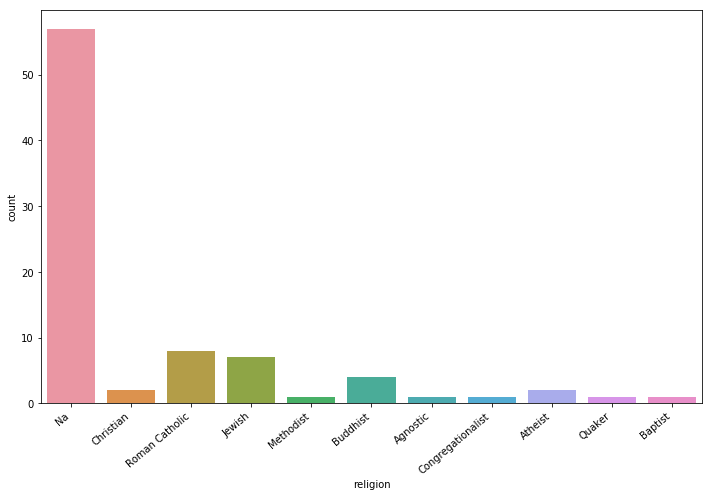

In [186]:
best_director = df_subset[df_subset.award=='Best Director']
best_actor = df_subset[df_subset.award=='Best Actor']
best_actress = df_subset[df_subset.award=='Best Actress']
best_supporting_actor = df_subset[df_subset.award=='Best Supporting Actor']
best_supporting_actress = df_subset[df_subset.award=='Best Supporting Actress']

ax = sns.countplot(x='religion', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

In [187]:
def prepare_religion(religion):
    if(religion=='Na'):
        return None;
    else:
        return religion;
df_subset['religion'] =  df_subset.apply(lambda row: prepare_religion(row['religion']), axis=1)

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [188]:
df_subset.religion.fillna(method='ffill', inplace=True)
df_subset.religion.fillna(method='bfill', inplace=True)

C:\Users\ehsun\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


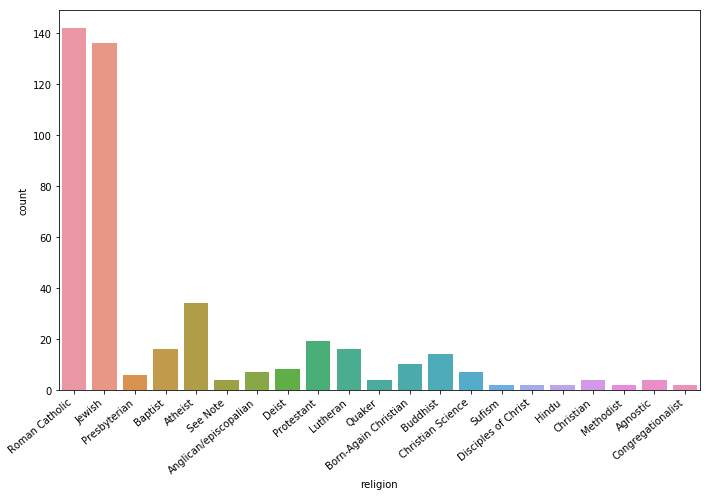

religion
Disciples of Christ        2
Methodist                  2
Hindu                      2
Congregationalist          2
Sufism                     2
Christian                  4
See Note                   4
Quaker                     4
Agnostic                   4
Presbyterian               6
Christian Science          7
Anglican/episcopalian      7
Deist                      8
Born-Again Christian      10
Buddhist                  14
Baptist                   16
Lutheran                  16
Protestant                19
Atheist                   34
Jewish                   136
Roman Catholic           142
dtype: int64

In [189]:
ax = sns.countplot(x='religion',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 15

plt.show()
df_subset.groupby('religion').size().sort_values(ascending=True)

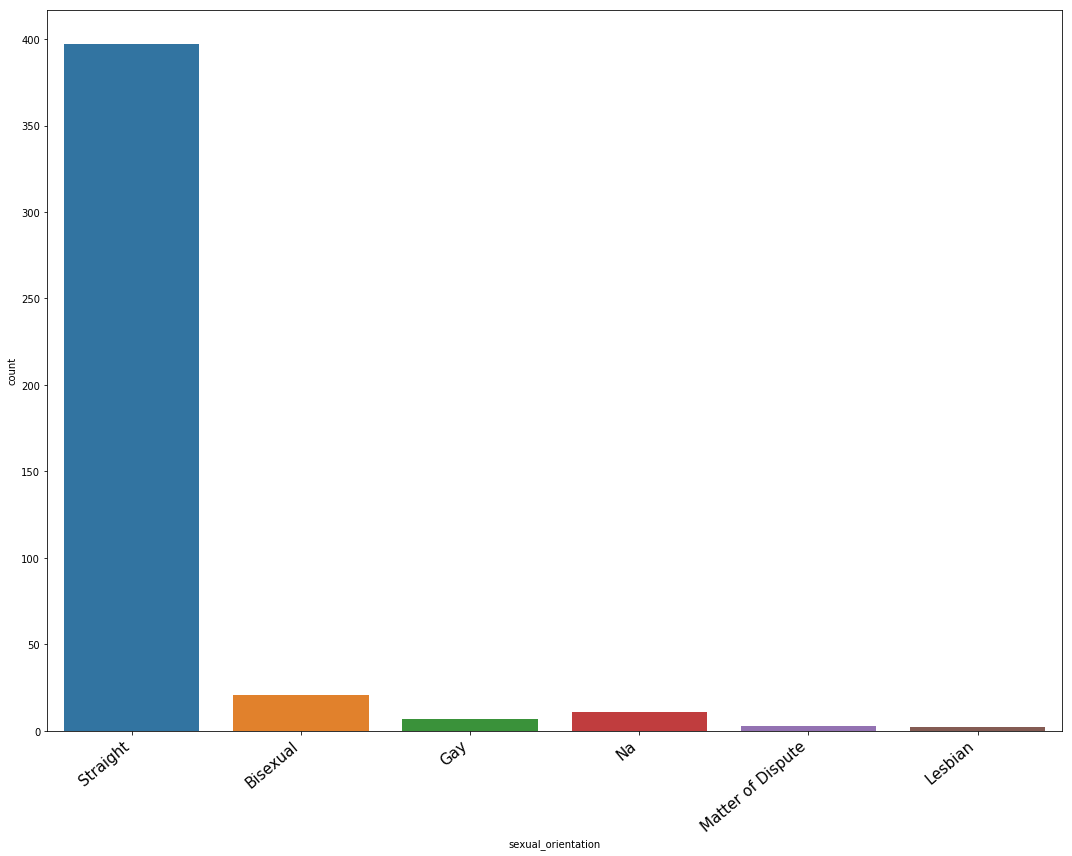

sexual_orientation
Bisexual              21
Gay                    7
Lesbian                2
Matter of Dispute      3
Na                    11
Straight             397
dtype: int64

In [190]:
ax = sns.countplot(x='sexual_orientation',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 15

plt.show()

df_subset.groupby('sexual_orientation').size()

In [191]:
def fix_miss_so(orientation):
    if(orientation=="Na"):
        return "Straight"
    else:
        return orientation
df_subset['sexual_orientation'] = df_subset.apply(lambda row: fix_miss_so(row['sexual_orientation']), axis=1)

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
def clean_rel(religion):
    if(religion=="Protestant"):
        return "Protestant"
    elif(religion=="Atheist"):
        return "Atheist"
    elif(religion=="Jewish"):
        return "Jewish"
    elif(religion=="Roman Catholic"):
        return "Roman Catholic"
    else:
        return "Other Religions"
df_subset['religion'] = df_subset.apply(lambda row: clean_rel(row['religion']), axis=1)

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


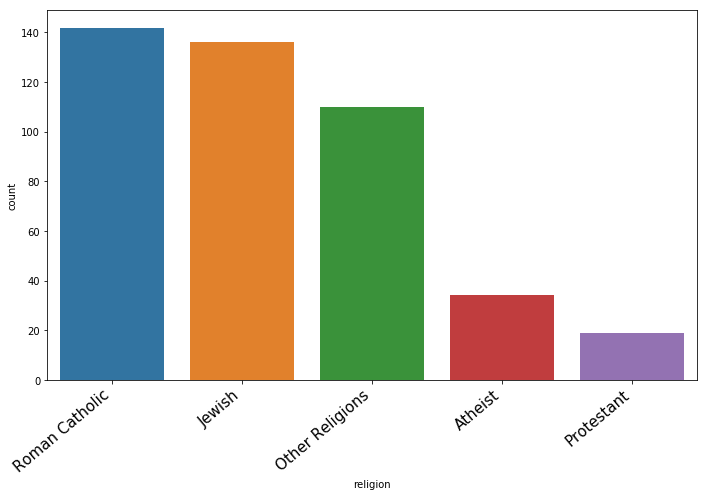

religion
Protestant          19
Atheist             34
Other Religions    110
Jewish             136
Roman Catholic     142
dtype: int64

In [193]:
ax = sns.countplot(x='religion',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 15

plt.show()
df_subset.groupby('religion').size().sort_values(ascending=True)

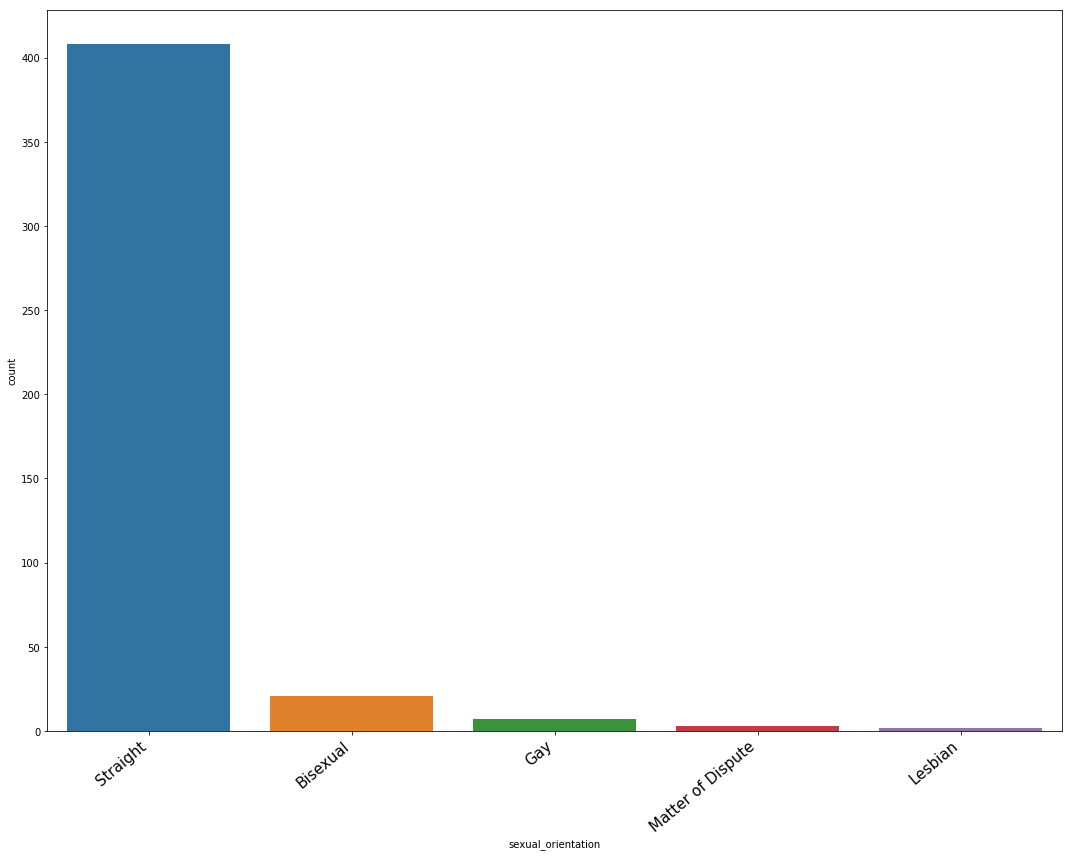

sexual_orientation
Bisexual              21
Gay                    7
Lesbian                2
Matter of Dispute      3
Straight             408
dtype: int64

In [194]:
ax = sns.countplot(x='sexual_orientation',data=df_subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 15

plt.show()

df_subset.groupby('sexual_orientation').size()

In [195]:
df_subset1 = df_subset

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cat_vars = ['race_ethnicity', 'age_bucket', 'country_category']
df_subset = pd.get_dummies(df_subset, columns=cat_vars)

In [197]:
categorical = ['birthplace', 'date_of_birth', 'race_ethnicity', 
      'year_of_award', 'award', 'ldob', 
      'year_of_birth', 'award_age', 'country', 'age_bucket','country_category', 'sexual_orientation', 'religion']
def list_difference(l1, l2):
    return (list(set(l1) - set(l2)))

In [198]:
from sklearn.feature_selection import RFE

features = df_subset.columns.tolist()
predictors = list_difference(features, categorical)
y=df_subset['award']

#train, test = train_test_split(df_subset, test_size=0.25)
predictors_train, predictors_test, y_train, y_test = train_test_split(df_subset[predictors], y, test_size=0.25)
target='award'
#creates the classifier
crf = RandomForestClassifier(n_jobs=2, n_estimators=10000, random_state=0)
rfe = RFE(crf, 5)
#train the data
crf.fit(predictors_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [199]:
# test the model
y_pred = crf.predict(predictors_test)

In [200]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,Best Actor,Best Actress,Best Director,Best Supporting Actor,Best Supporting Actress
Actual,,,,,
Best Actor,3,0,17,2,0
Best Actress,2,10,4,2,0
Best Director,1,2,16,7,0
Best Supporting Actor,2,1,10,6,1
Best Supporting Actress,1,7,10,6,1


In [201]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.32432432432432434


In [202]:
feature_imp = pd.Series(crf.feature_importances_,index=predictors).sort_values(ascending=True)
feature_imp

race_ethnicity_Asian                0.006108
race_ethnicity_Multiracial          0.006223
race_ethnicity_Middle Eastern       0.007060
race_ethnicity_Hispanic             0.035268
country_category_France             0.036572
race_ethnicity_Black                0.039837
country_category_Italy              0.040688
country_category_Canada             0.040966
country_category_England            0.065098
race_ethnicity_White                0.070329
country_category_Other Countries    0.072676
country_category_USA                0.077675
age_bucket_45-55                    0.079736
age_bucket_55-83                    0.085234
age_bucket_35-45                    0.085614
age_bucket_0-35                     0.250917
dtype: float64

In [203]:
# Clean Outlier for Best Director
best_director = df_subset1[df_subset1.award=='Best Director']

age_series = sorted(best_director['award_age'])
q1, q3= np.percentile(age_series,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

def remove_age_outliers(age):
    if(age<lower_bound):
        return None
    elif(age>upper_bound):
        return None
    else:
        return age
    
best_director['award_age'] = best_director.apply(lambda row: remove_age_outliers(row['award_age']), axis=1)
best_director = best_director.dropna()

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [204]:
# Clean Outlier for Best Actor
best_actor = df_subset1[df_subset1.award=='Best Actor']

age_series = sorted(best_actor['award_age'])
q1, q3= np.percentile(age_series,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

def remove_age_outliers(age):
    if(age<lower_bound):
        return None
    elif(age>upper_bound):
        return None
    else:
        return age
    
best_actor['award_age'] = best_actor.apply(lambda row: remove_age_outliers(row['award_age']), axis=1)
best_actor = best_actor.dropna()

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [205]:
# Clean Outlier for Best Supporting Actor
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']

age_series = sorted(best_supporting_actor['award_age'])
q1, q3= np.percentile(age_series,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

def remove_age_outliers(age):
    if(age<lower_bound):
        return None
    elif(age>upper_bound):
        return None
    else:
        return age
    
best_supporting_actor['award_age'] = best_supporting_actor.apply(lambda row: remove_age_outliers(row['award_age']), axis=1)
best_supporting_actor = best_supporting_actor.dropna()

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [206]:
# Clean Outlier for Best Actress
best_actress = df_subset1[df_subset1.award=='Best Actress']

age_series = sorted(best_actress['award_age'])
q1, q3= np.percentile(age_series,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

def remove_age_outliers(age):
    if(age<lower_bound):
        return None
    elif(age>upper_bound):
        return None
    else:
        return age
    
best_actress['award_age'] = best_actress.apply(lambda row: remove_age_outliers(row['award_age']), axis=1)
best_actress = best_actress.dropna()

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [207]:
# Clean Outlier for Best Supporting Actress
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

age_series = sorted(best_supporting_actress['award_age'])
q1, q3= np.percentile(age_series,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

def remove_age_outliers(age):
    if(age<lower_bound):
        return None
    elif(age>upper_bound):
        return None
    else:
        return age
    
best_supporting_actress['award_age'] = best_supporting_actress.apply(lambda row: remove_age_outliers(row['award_age']), axis=1)
best_supporting_actress = best_supporting_actress.dropna()

C:\Users\ehsun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [208]:
df_subset1 = pd.concat([best_director, best_actor, best_supporting_actor, best_actress, best_supporting_actress], ignore_index=True)

In [209]:
df_subset1['age_bucket'] = pd.cut(df_subset1['award_age'], 
                                 [0, 35, 45, 55, df_subset1['award_age'].max()], 
                                 labels=['0-35', '35-45', '45-55','55'+'-'+str(int(df_subset1['award_age'].max()))])

In [210]:
#Normalization Gave Me Bad Accuracy
xyz = pd.DataFrame()
xyz['award_age']=(df_subset1['award_age']-df_subset1['award_age'].min())/(df_subset1['award_age'].max()-df_subset1['award_age'].min())

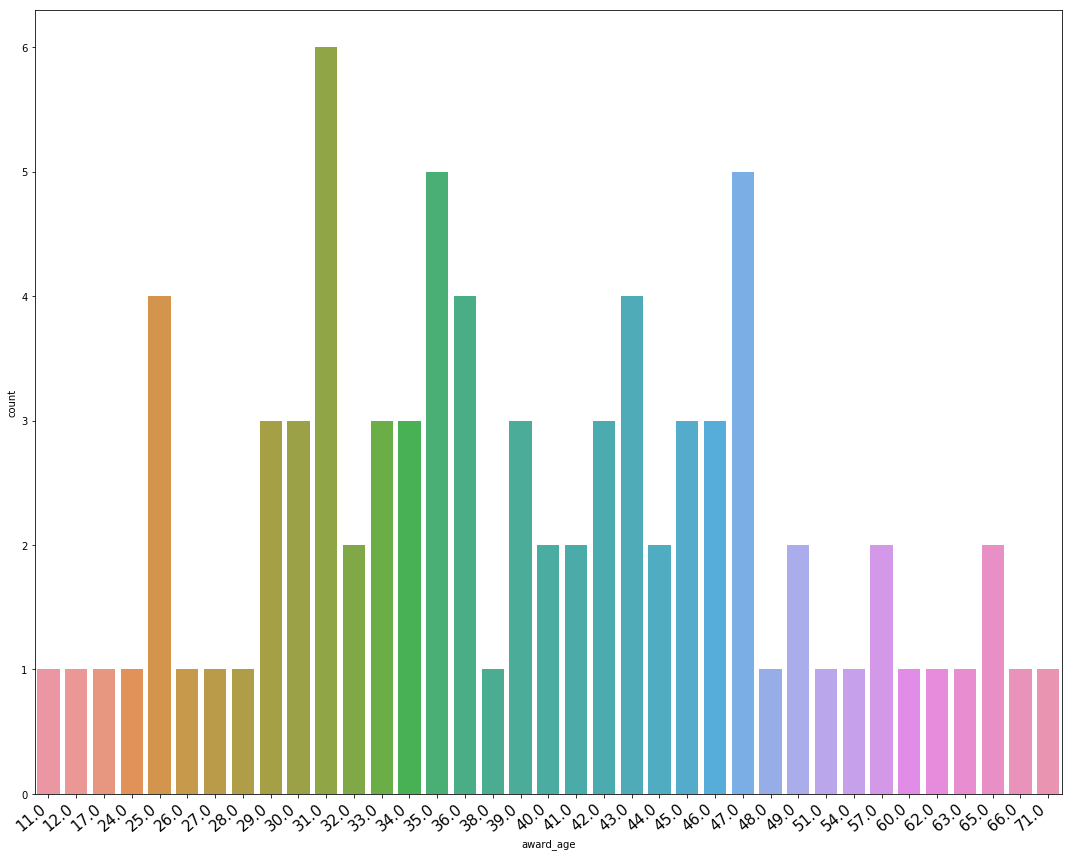

In [211]:
ax = sns.countplot(x='award_age', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

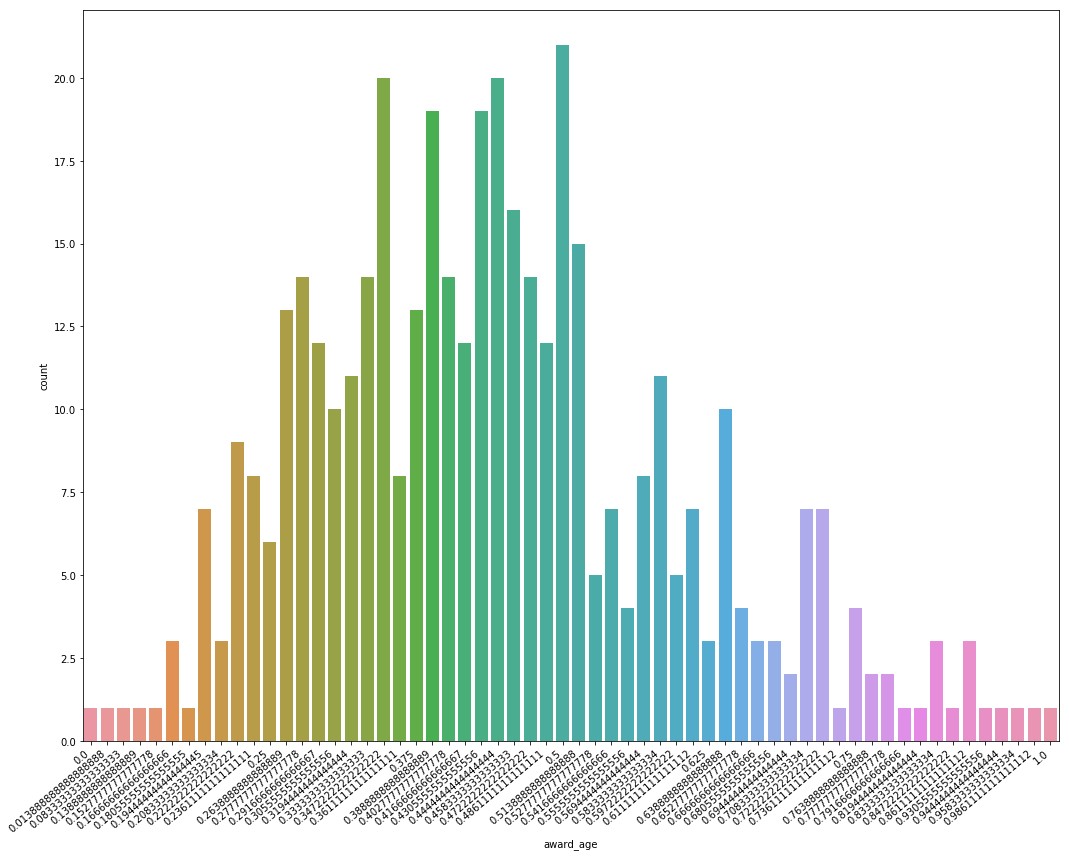

In [212]:
ax = sns.countplot(x='award_age', data=xyz)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15, 12)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

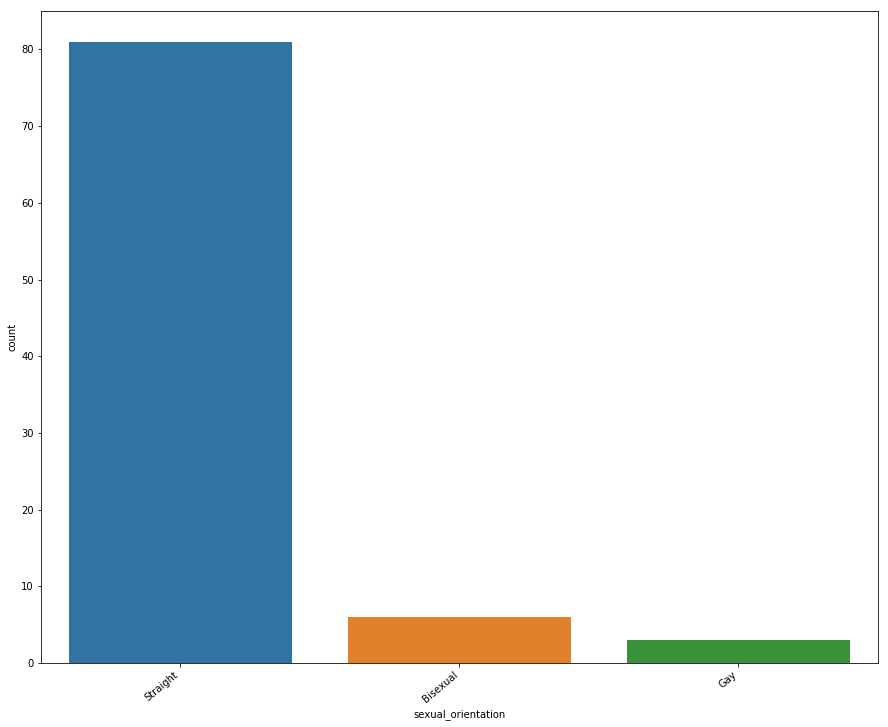

In [213]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10
ax = sns.countplot(x='sexual_orientation', data=best_director)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


plt.show()


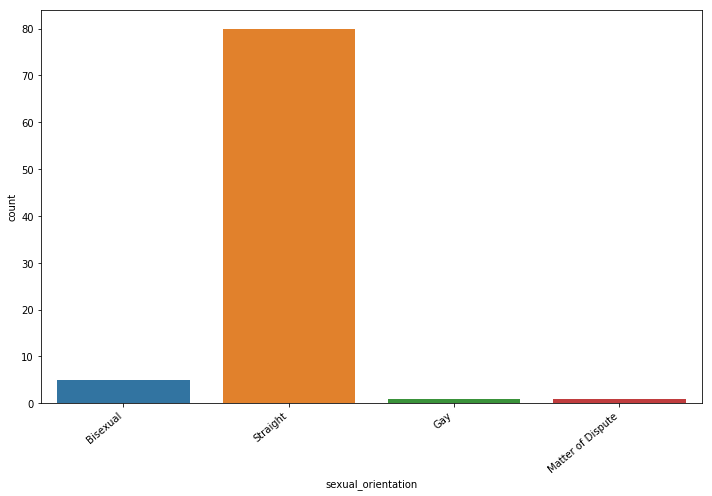

In [214]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='sexual_orientation', data=best_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()


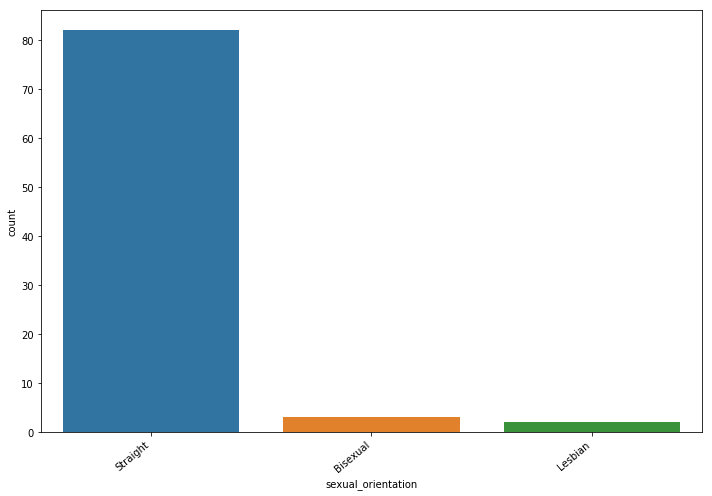

In [215]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='sexual_orientation', data=best_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()


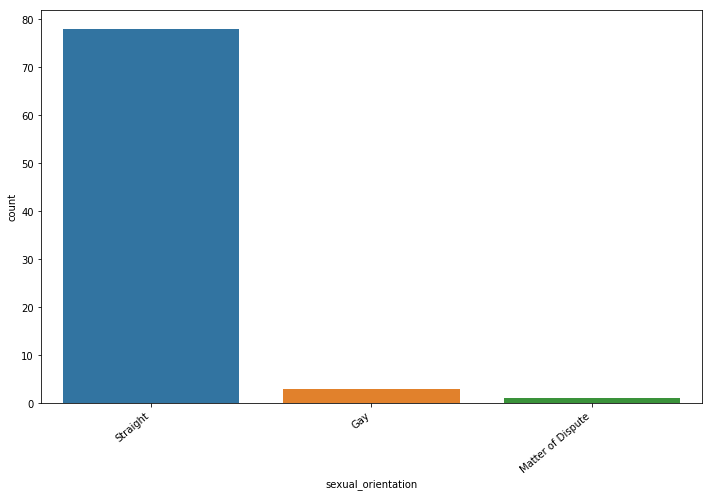

In [216]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='sexual_orientation', data=best_supporting_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()


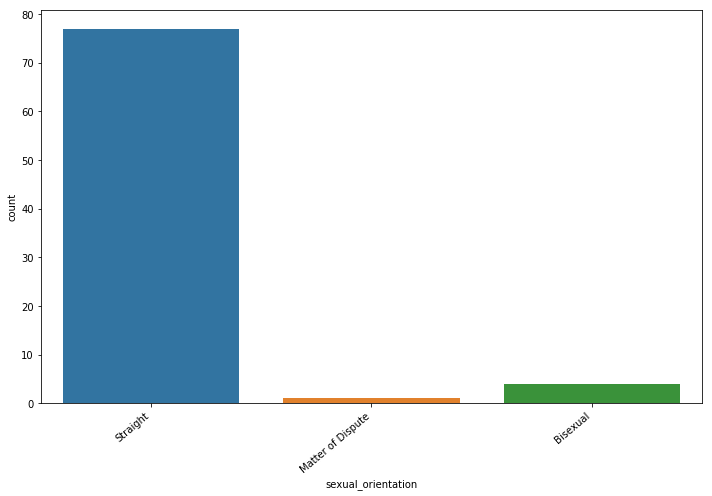

In [217]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='sexual_orientation', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()


In [218]:
def cleanse_orientation(orient):
    if(orient!='Straight'):
        return 'Other Orientations'
    else:
        return orient
df_subset1['sexual_orientation'] = df_subset1.apply(lambda row: cleanse_orientation(row['sexual_orientation']), axis=1)

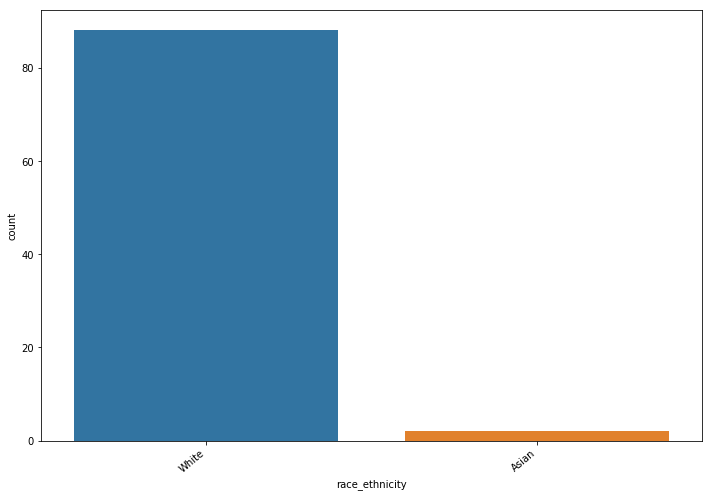

In [219]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='race_ethnicity', data=best_director)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

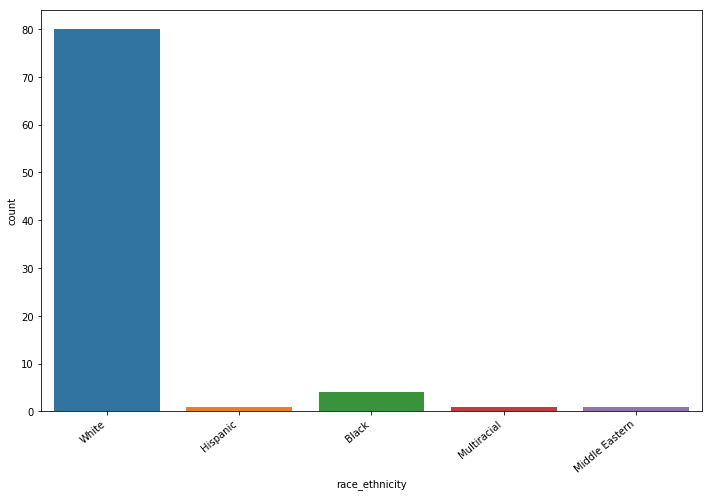

In [220]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='race_ethnicity', data=best_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

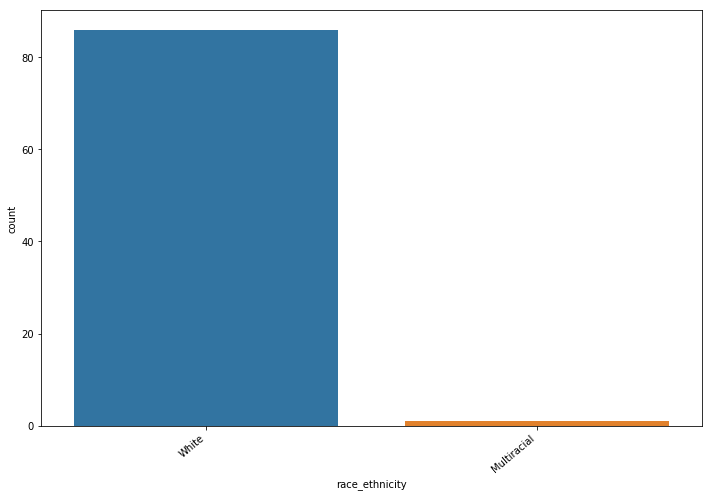

In [221]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='race_ethnicity', data=best_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

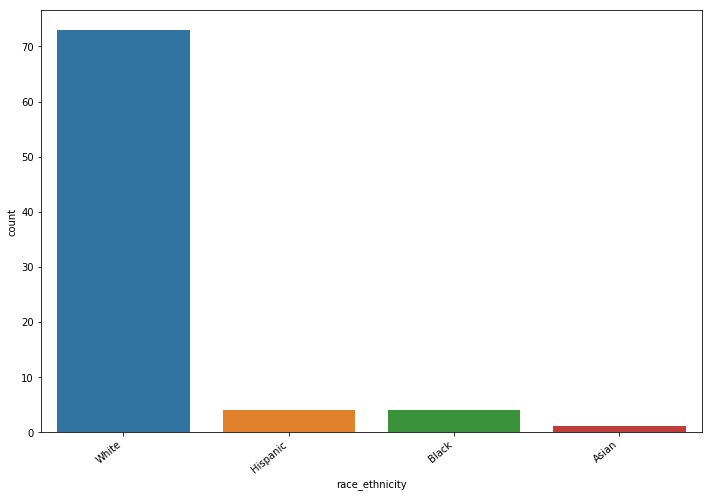

In [222]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='race_ethnicity', data=best_supporting_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

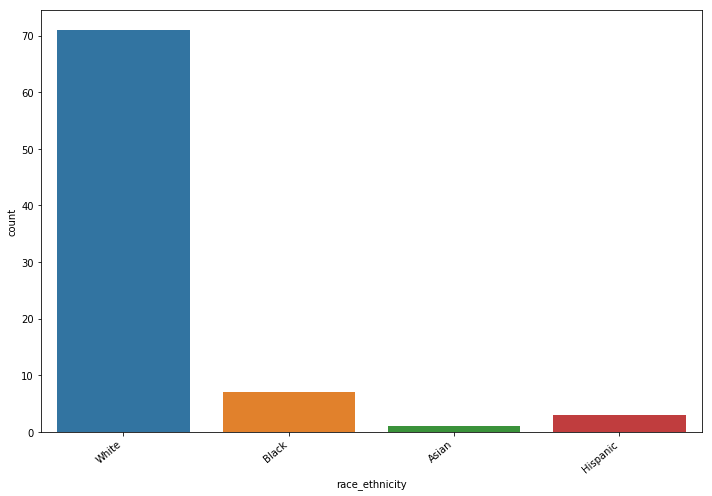

In [223]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='race_ethnicity', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

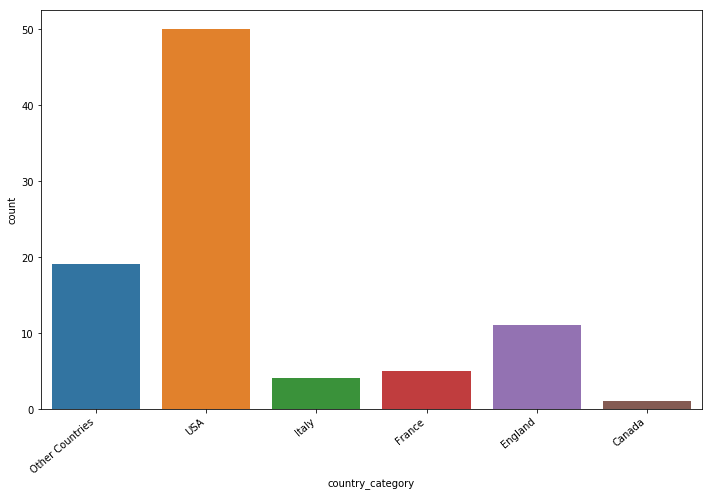

In [224]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='country_category', data=best_director)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

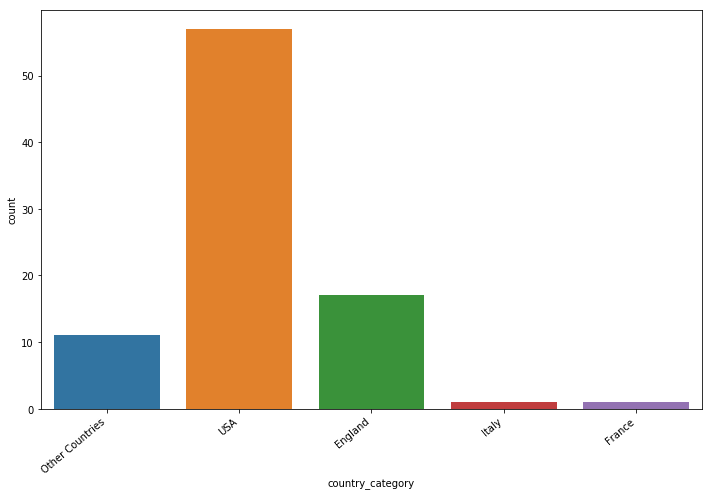

In [225]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='country_category', data=best_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

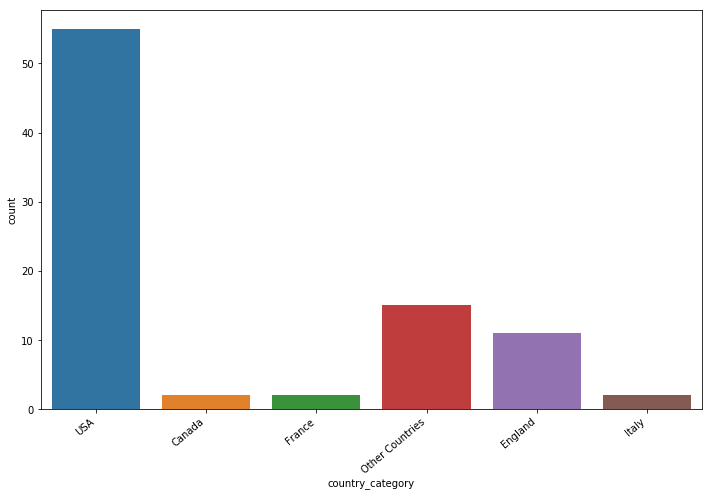

In [226]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='country_category', data=best_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

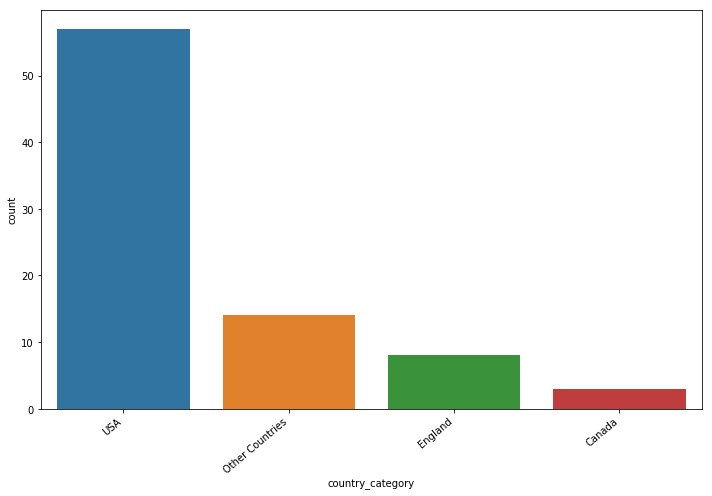

In [227]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']


ax = sns.countplot(x='country_category', data=best_supporting_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

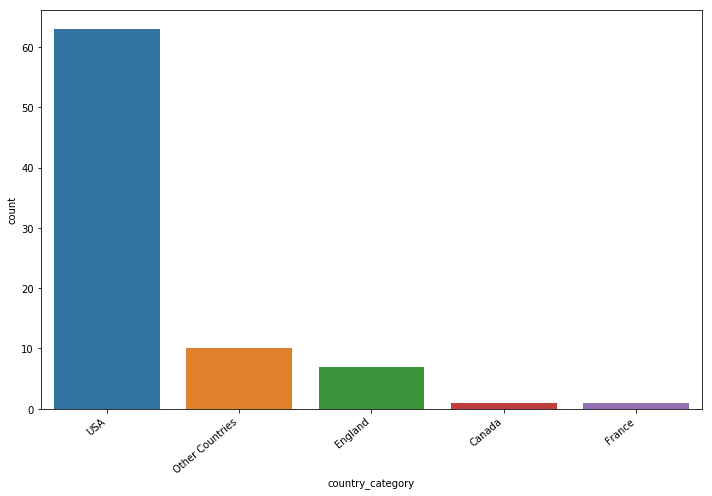

In [228]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='country_category', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

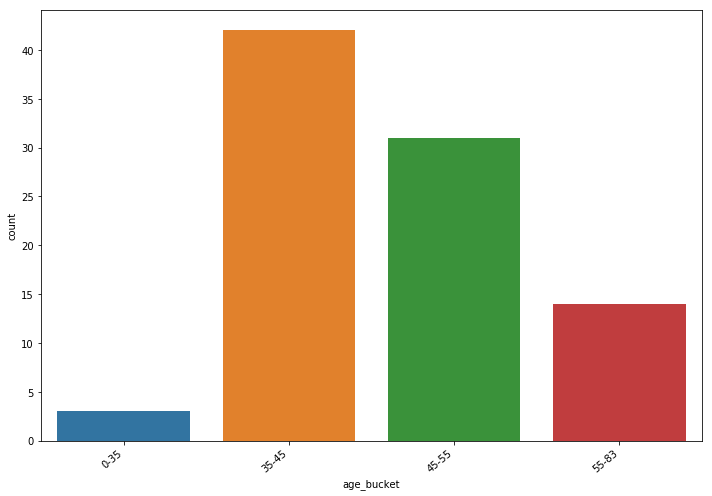

In [229]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='age_bucket', data=best_director)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

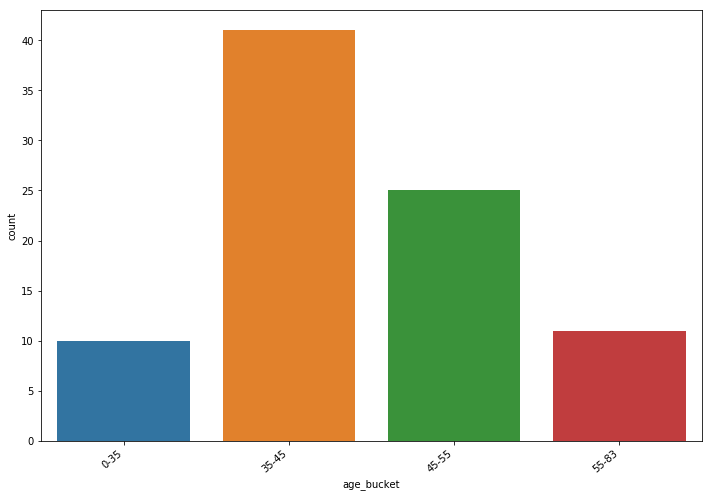

In [230]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='age_bucket', data=best_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

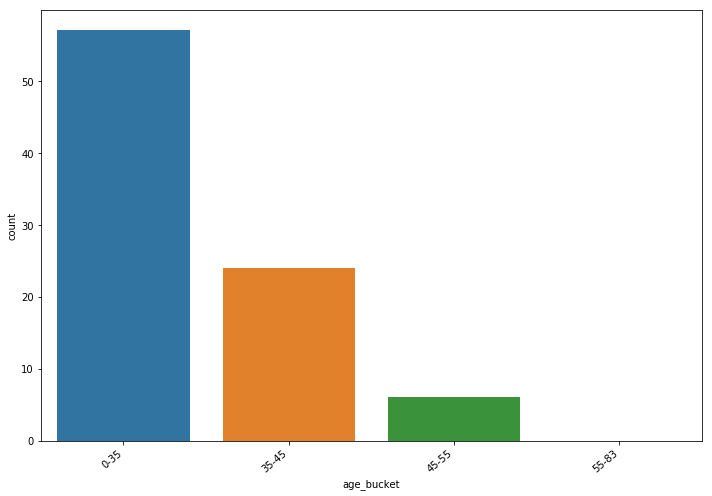

In [231]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='age_bucket', data=best_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

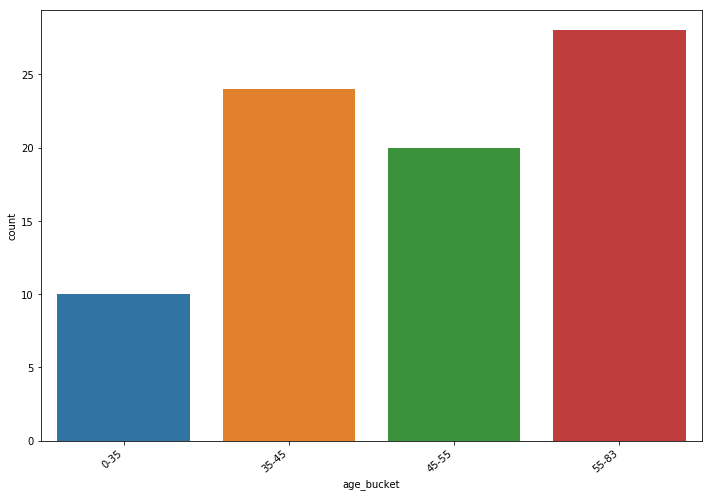

In [232]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='age_bucket', data=best_supporting_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

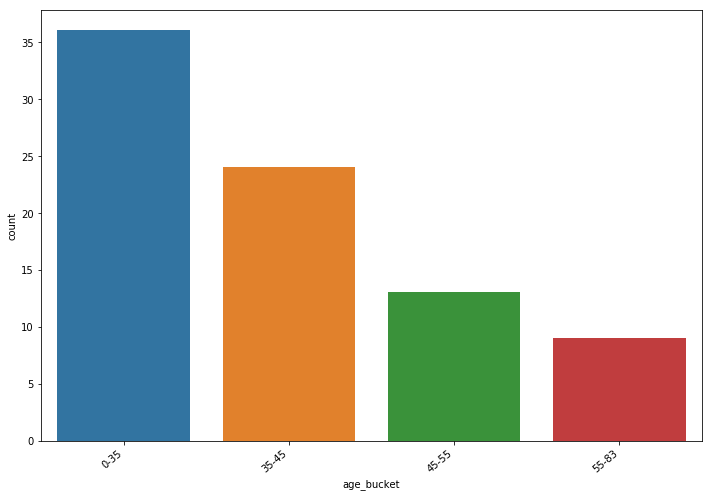

In [233]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='age_bucket', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

In [234]:
def add_gender(award):
    if(award=="Best Actor" or award=="Best Supporting Actor"):
        return "Male"
    elif(award=="Best Actress" or award=="Best Supporting Actress"):
        return "Female"
    else:
        return None
df_subset1['gender'] = df_subset1.apply(lambda row: add_gender(row['award']), axis=1)

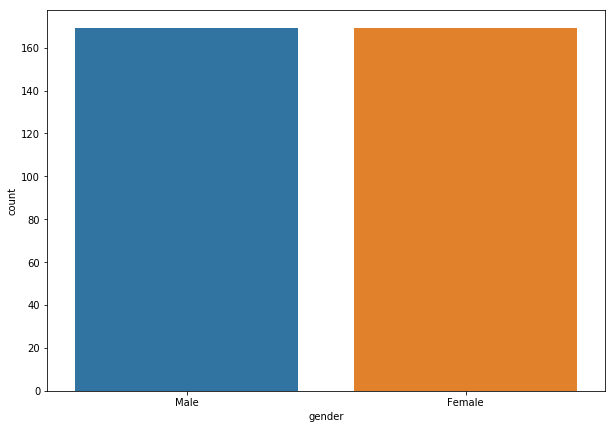

In [235]:
ax = sns.countplot(x="gender", data=df_subset1)

In [236]:
df_subset1.gender.fillna(method='bfill', inplace=True)

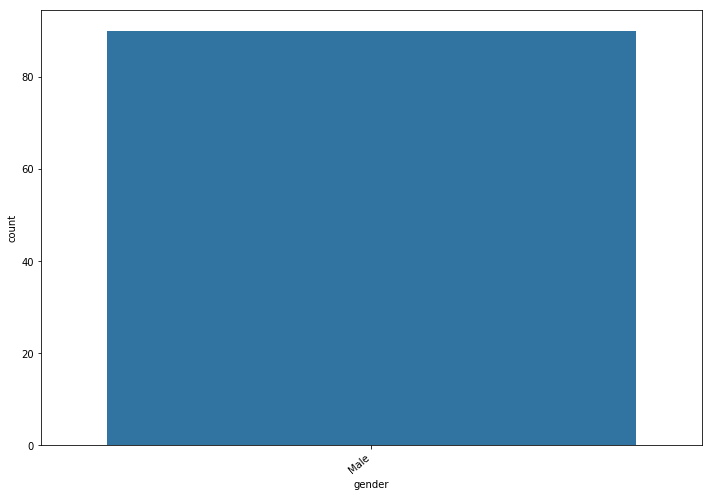

In [237]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='gender', data=best_director)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

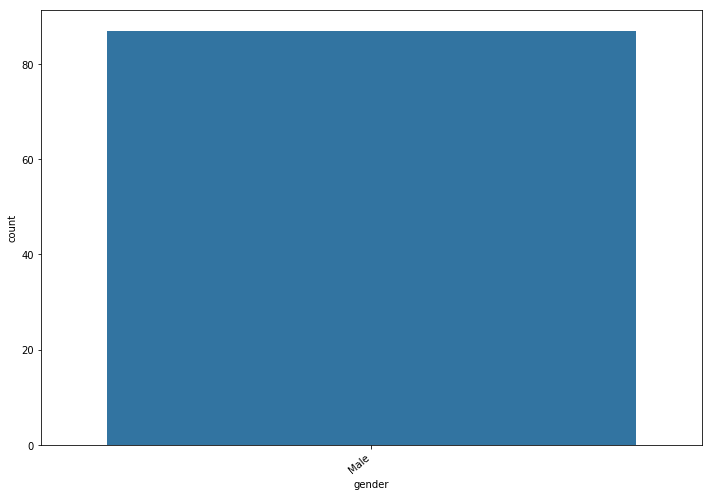

In [238]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='gender', data=best_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

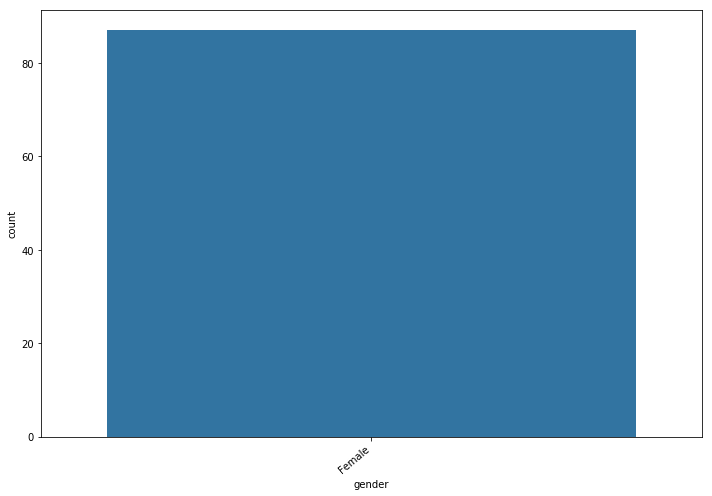

In [239]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='gender', data=best_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

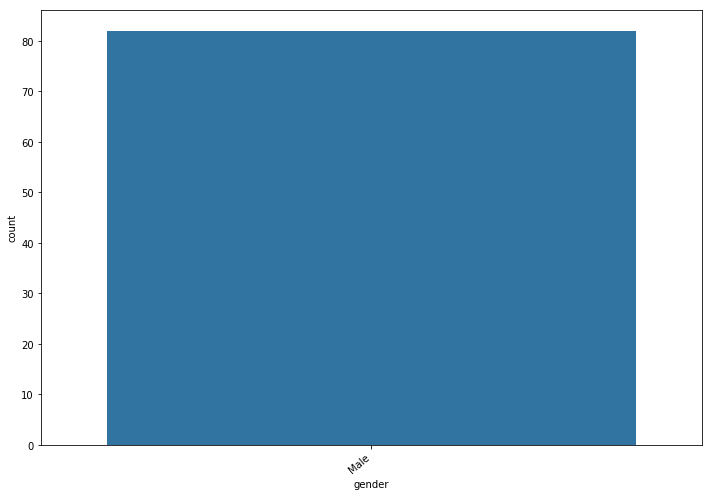

In [240]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='gender', data=best_supporting_actor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

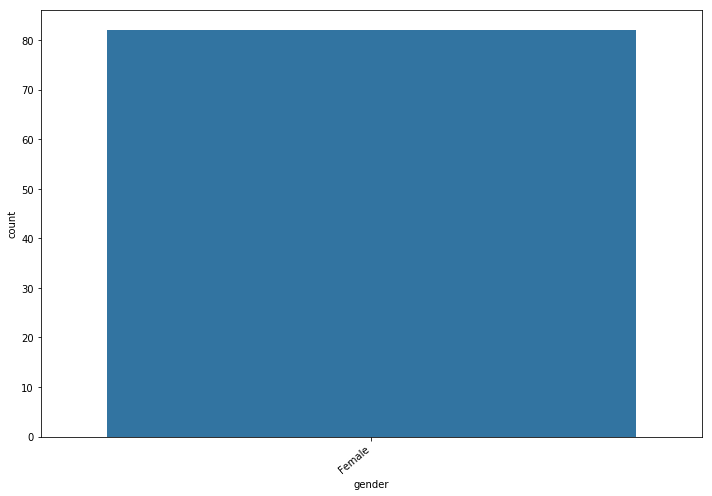

In [241]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']

ax = sns.countplot(x='gender', data=best_supporting_actress)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["xtick.labelsize"] = 10

plt.show()

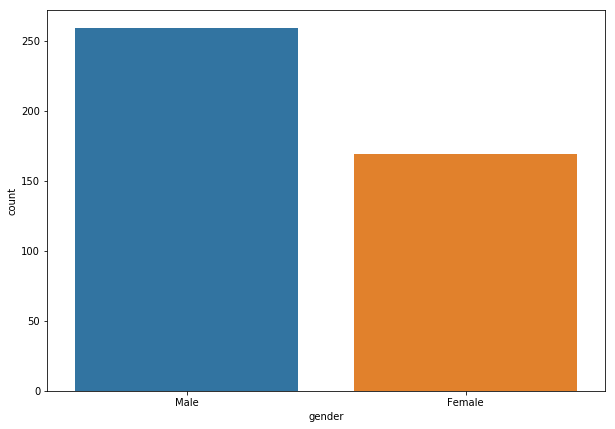

In [242]:
ax = sns.countplot(x="gender", data=df_subset1)

In [243]:
df_subset1.describe()

,year_of_award,ldob,year_of_birth,award_age
count,428.000000,428.000000,428.000000,428.000000
mean,1972.934579,8.927570,1929.857477,43.077103
std,24.086892,0.877449,25.704696,11.750176
min,1927.000000,4.000000,1868.000000,11.000000
25%,1952.000000,8.000000,1908.000000,35.000000
50%,1973.000000,9.000000,1929.500000,42.000000
75%,1994.000000,9.000000,1950.250000,49.000000
max,2014.000000,15.000000,1990.000000,83.000000


In [263]:
best_director = df_subset1[df_subset1.award=='Best Director']
best_actor = df_subset1[df_subset1.award=='Best Actor']
best_actress = df_subset1[df_subset1.award=='Best Actress']
best_supporting_actor = df_subset1[df_subset1.award=='Best Supporting Actor']
best_supporting_actress = df_subset1[df_subset1.award=='Best Supporting Actress']
print("Best Director Mean Age: " + str(best_director['award_age'].mean()))
print("Best Actor Mean Age: " + str(best_actor['award_age'].mean()))
print("Best Actress Mean Age: " + str(best_actress['award_age'].mean()))
print("Best Supporting Actor Mean Age: " + str(best_supporting_actor['award_age'].mean()))
print("Best Supporting Actress Mean Age: " + str(best_supporting_actress['award_age'].mean()))

Best Director Mean Age: 46.955555555555556
Best Actor Mean Age: 44.67816091954023
Best Actress Mean Age: 33.689655172413794
Best Supporting Actor Mean Age: 50.890243902439025
Best Supporting Actress Mean Age: 39.26829268292683


In [244]:
cat_vars1 = ['race_ethnicity', 'country_category', 'age_bucket', 'sexual_orientation','religion', 'gender'] 
df_subset1 = pd.get_dummies(df_subset1, columns=cat_vars1)

In [245]:
features = df_subset1.columns.tolist()
categorical = ['birthplace', 'date_of_birth', 'race_ethnicity', 
                'year_of_award', 'award', 'ldob', 
                'year_of_birth','country', 'award_age','age_bucket',
                'country_category', 'sexual_orientation', 'religion', 'gender']
predictors = list_difference(features, categorical)
y=df_subset1['award']


predictors_train, predictors_test, y_train, y_test = train_test_split(df_subset1[predictors], y, test_size=0.4)
target='award'
#creates the classifier
crf = RandomForestClassifier(n_jobs=2, n_estimators=10000, random_state=0,oob_score=True)
#train the data
crf.fit(predictors_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=2,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [246]:
# test the model
y_pred = crf.predict(predictors_test)

In [247]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,Best Actor,Best Actress,Best Director,Best Supporting Actor,Best Supporting Actress
Actual,,,,,
Best Actor,14,0,12,6,0
Best Actress,0,27,0,0,3
Best Director,10,0,17,3,0
Best Supporting Actor,4,0,12,13,0
Best Supporting Actress,0,35,0,0,16


In [248]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5058139534883721


In [253]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                         precision    recall  f1-score   support

             Best Actor       0.50      0.44      0.47        32
           Best Actress       0.44      0.90      0.59        30
          Best Director       0.41      0.57      0.48        30
  Best Supporting Actor       0.59      0.45      0.51        29
Best Supporting Actress       0.84      0.31      0.46        51

              micro avg       0.51      0.51      0.51       172
              macro avg       0.56      0.53      0.50       172
           weighted avg       0.59      0.51      0.49       172



In [254]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [255]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(10,shuffle=True, random_state=0)
sr1=cross_val_score(crf, df_subset1[predictors], y, scoring='accuracy',cv=crossvalidation, n_jobs=1)

In [256]:
sr1

array([0.6744186 , 0.51162791, 0.62790698, 0.48837209, 0.48837209,
       0.69767442, 0.53488372, 0.60465116, 0.57142857, 0.54761905])

In [257]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(crf, threshold=0.05)

# Train the selector
sfm.fit(predictors_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=2,
            oob_score=True, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.05)

In [258]:
for feature_list_index in sfm.get_support(indices=True):
    print(predictors[feature_list_index])

religion_Jewish
gender_Male
age_bucket_0-35
gender_Female


In [259]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(predictors_train)
X_important_test = sfm.transform(predictors_test)

In [260]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=2)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [261]:
from sklearn.metrics import accuracy_score
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.436046511627907